In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
#loading the dataset
df = pd.read_csv('heart.csv')

In [38]:
#exploring the data
print("First five rows:\n", df.head())
print("\nDataset shape:", df.shape)
print("\nClass distribution:\n", df['target'].value_counts())

First five rows:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Dataset shape: (1025, 14)

Class distribution:
 target
1    526
0    499
Name: count, dtype: int64


In [40]:
#splitting into features and target
X = df.drop('target', axis=1)
y = df['target']

In [42]:
#train and test split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42, stratify=y)

In [44]:
#feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
#defining the SVM model and evaluation function
def build_and_evaluate_svm(X_train, y_train, X_test, y_test):
    svc = SVC()
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
    grid = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    print("Best parameters found:", grid.best_params_)
    best_svm = grid.best_estimator_
    #predictions
    y_pred = best_svm.predict(X_test)
    #evaluation
    print("\nAccuracy:", accuracy_score(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    #plotting the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

Best parameters found: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

Accuracy: 0.9853658536585366

Confusion Matrix:
 [[ 97   3]
 [  0 105]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98       100
           1       0.97      1.00      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.98      0.99       205
weighted avg       0.99      0.99      0.99       205



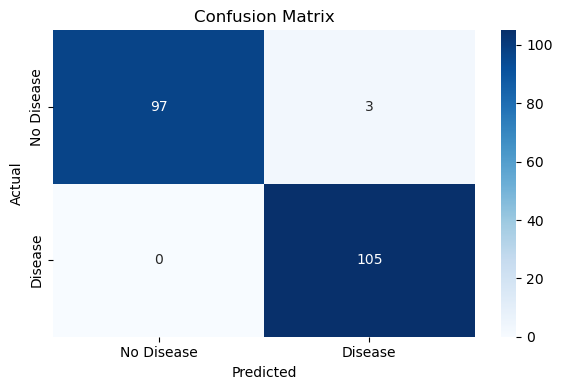

In [48]:
#run the function
build_and_evaluate_svm(X_train_scaled, y_train, X_test_scaled, y_test)